In [83]:
import pandas as pd
import numpy as np

from exchange import *
from agents import *

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

# Exchange Visualization

In [37]:
e = Exchange()

In [38]:
e.add_bid(100, 5, "1")
e.add_bid(102, 2, "2")
e.add_bid(103, 3, "3")
e.add_bid(104, 4, "4")
e.add_bid(105, 10, "5")
e.add_ask(106, 8, "6")
e.add_ask(107, 3, "7")
e.add_ask(109, 12, "8")
e.add_ask(110, 6, "9")
e.add_ask(115, 4, "10")

In [39]:
def show_exchange(exchange):
    bidPrices = list(exchange.bids.keys())
    bidQtys = list(exchange.bids.values())
    askPrices = list(exchange.asks.keys())
    askQtys = list(exchange.asks.values())

    plt.figure(figsize=(3, 5))
    plt.barh(bidPrices, bidQtys, color="green", label=f"bid qty: {sum(bidQtys)}")
    plt.barh(askPrices, askQtys, color="red", label=f"ask qty: {sum(askQtys)}")
    plt.legend()
    plt.ylabel("price")
    plt.xlabel("qty")
    plt.title("Exchange Ladder")

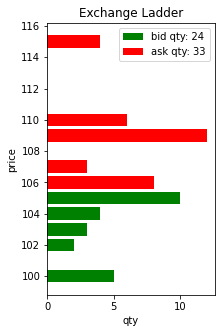

In [40]:
show_exchange(e)

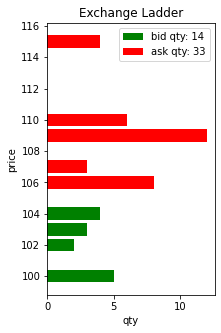

In [41]:
e.add_ask(105, 10, "11")
show_exchange(e)

# Simulation Elements

In [ ]:
'''
# TODO: agent arrival process
# TODO: agent cancel duration
# TODO: true price movement changing (variance over time)
# TODO: agent reading true price (with some noise)
# TODO: agent aggression level (bid / ask)
# TODO: agent interaction logic with exchange
'''

In [ ]:
def check_agent_arrival(timestamp, time):
    return time

In [43]:
np.random.exponential()

0.5870240046868609

In [46]:
intervals = [random.expovariate(2) for i in range(10)]
intervals

[0.11579589931178207,
 0.34277037887371103,
 1.244800222819103,
 0.3788962698465697,
 0.549686298644611,
 0.7071139782317653,
 0.6621442478816655,
 0.14018391280605483,
 0.022009161534121607,
 0.21320011716670412]

In [47]:
np.cumsum(intervals)

array([0.1157959 , 0.45856628, 1.7033665 , 2.08226277, 2.63194907,
       3.33906305, 4.0012073 , 4.14139121, 4.16340037, 4.37660049])

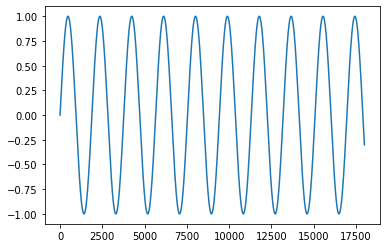

In [82]:
x = np.arange(0, 5 * 60 * 60)
T = 60 * 5 # period
y = np.sin(x / T)
plt.plot(x, y)

In [79]:
t = 40
true_price = np.sin(t / T)
true_price

-0.9589242746631385

In [98]:
np.random.normal()

1.8142763152800208

In [ ]:
# pre-determine some true price curve as a function of time
# can begin as uniform
random.seed(88)

### defining hyperparameters ###
agent_arrival_rate = 10
taker_probability = 0.2
true_price_func = lambda t: np.sin(t / 5*60)

while timestamp < 10: 
    timestamp = 0
    
    ### pseudo code this ###

    # agent arrives by some exponential inter-arrival time simulating poisson
    # increment timestamp by exponential variable
    # calculate agent's characteristics (aggression level, theo value, cancel duration)
    # first check existing cancel queue, remove orders if necessary
    # add agent's bid/asks to exchange
    # plot exchange
    # sidenote: also need to increment customerids

    # add in own policy logic 

    ### ------------------------------------------------------------ ###

    # agents arrive at same rate, some probability they are maker vs taker
    agent_arrival_time = random.expovariate(agent_arrival_rate)

    agent_is_taker = random.random() < taker_probability
    if agent_is_taker:
        a = Taker()
    else: 
        a = Maker()

In [113]:
from scipy.stats import skewnorm, norm

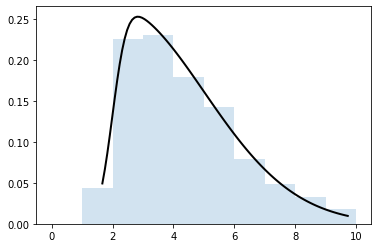

In [111]:
# aggressiveness level distributions, in units of ticks from theo value
a = 8
rv = skewnorm(a, loc=2, scale=3)
x = np.linspace(skewnorm.ppf(0.01, a, loc=2, scale=3), skewnorm.ppf(0.99, a, loc=2, scale=3), 100)

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = skewnorm.rvs(a, loc=2, scale=3, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

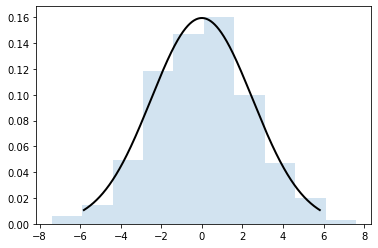

In [120]:
# agent theo value
# simply add gaussian noise

sd = 2.5
rv = norm(scale=sd)
x = np.linspace(norm.ppf(0.01, scale=sd), norm.ppf(0.99, scale=sd), 1000)

plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = norm.rvs(scale=sd, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [ ]:
# for now cancel duration can just be an integer
cancel_duration = 180 # seconds